In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)

## Importing the dataset

In [2]:
df=pd.read_csv('new_model.csv')
df

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,1.0,49.0,0.5,150.00,4.90,15.7,6700.0,4.90,0.0,0
396,70.0,1.025,0.0,0.0,1.0,31.0,1.2,141.00,3.50,16.5,7800.0,6.20,0.0,0
397,80.0,1.020,0.0,0.0,1.0,26.0,0.6,137.00,4.40,15.8,6600.0,5.40,0.0,0
398,60.0,1.025,0.0,0.0,1.0,50.0,1.0,135.00,4.90,14.2,7200.0,5.90,0.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB


<AxesSubplot:xlabel='Rbc', ylabel='count'>

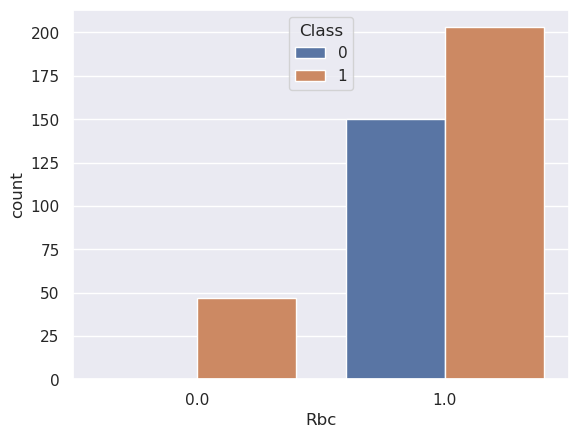

In [4]:
sns.countplot(data=df,x="Rbc",hue="Class")

<AxesSubplot:xlabel='Al', ylabel='count'>

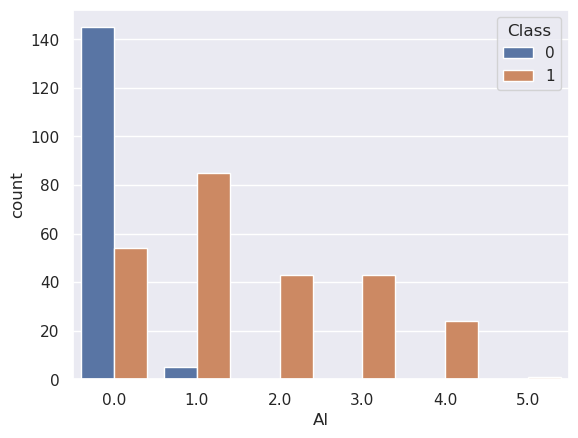

In [5]:
sns.countplot(data=df,x="Al",hue="Class")

<AxesSubplot:xlabel='Hemo', ylabel='Count'>

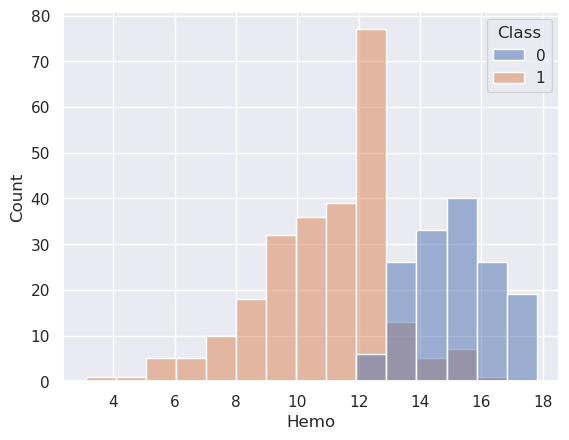

In [6]:
sns.histplot(data=df,x="Hemo",hue="Class")

<AxesSubplot:xlabel='Bp', ylabel='Count'>

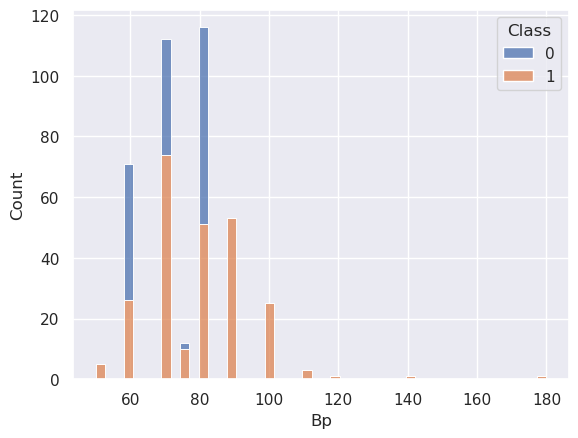

In [7]:
sns.histplot(data=df,x="Bp",hue="Class",multiple="stack")  # multiple=stack to have stacked categories that lie one on the top of the other

## Data Preprocessing

In [8]:
# Checking for Nan Values in the dataset
df.isnull().sum()

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64

In [9]:
df_copy=df.copy(deep=True)

In [10]:
df_copy[['Bp','Sg','Bu','Sc','Sod','Pot','Hemo','Wbcc','Rbcc']]=df_copy[['Bp','Sg','Bu','Sc','Sod','Pot','Hemo','Wbcc','Rbcc']].replace(0,np.NaN)
print(df_copy.isnull().sum())

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64


## Checking for balance in the class

In [11]:
import warnings
warnings.simplefilter("ignore")

1    250
0    150
Name: Class, dtype: int64

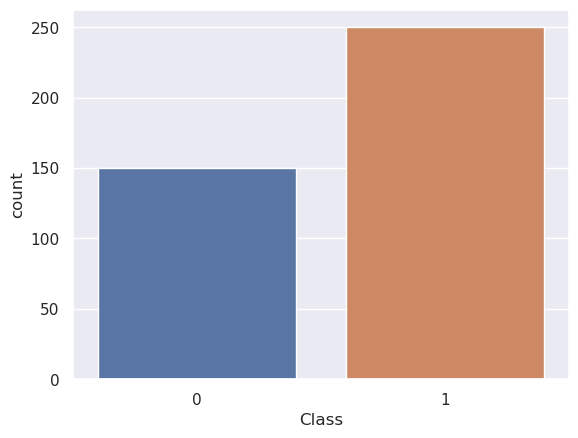

In [12]:
sns.countplot(df['Class'])
df.Class.value_counts()

In [13]:
# Using oversampling algorithm to balance the class
from sklearn.utils import resample
df_majority_count=df[(df['Class'])==1]
df_minority_count=df[(df['Class'])==0]

df_minor_upsampled=resample(df_minority_count,n_samples=250,random_state=0)
df2=pd.concat([df_minor_upsampled,df_majority_count])

0    250
1    250
Name: Class, dtype: int64

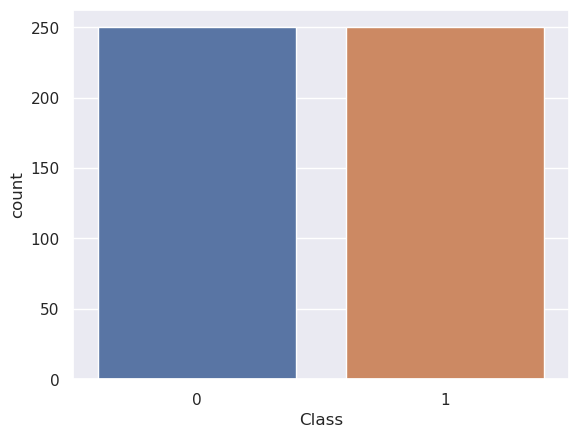

In [14]:
sns.countplot(df2['Class'])
df2.Class.value_counts()

## Boxplot - To display outliers

<AxesSubplot:xlabel='Bp'>

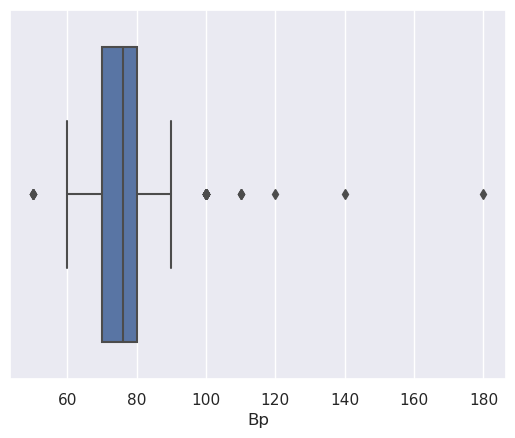

In [15]:
sns.boxplot(x=df2['Bp'])

<AxesSubplot:xlabel='Hemo'>

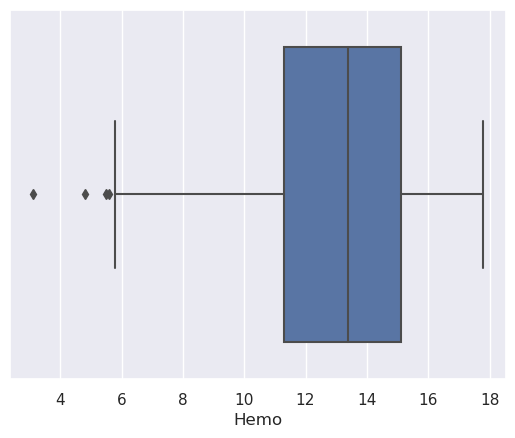

In [16]:
sns.boxplot(x=df2['Hemo'])

<AxesSubplot:xlabel='Rbcc'>

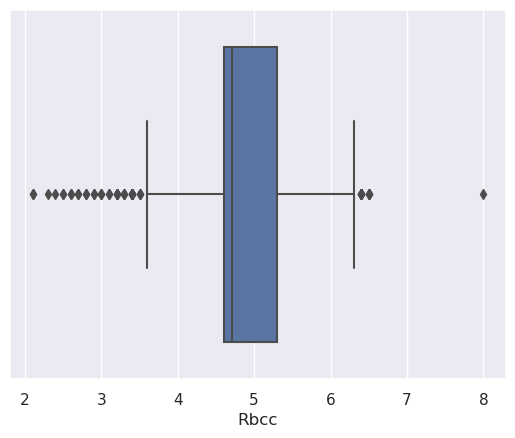

In [17]:
sns.boxplot(x=df2['Rbcc'])

<AxesSubplot:xlabel='Sod'>

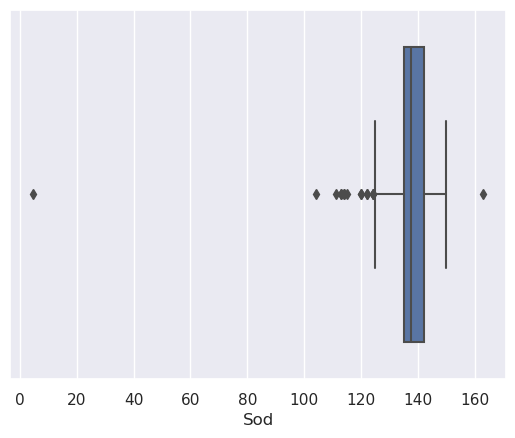

In [18]:
sns.boxplot(x=df2['Sod'])

<AxesSubplot:xlabel='Pot'>

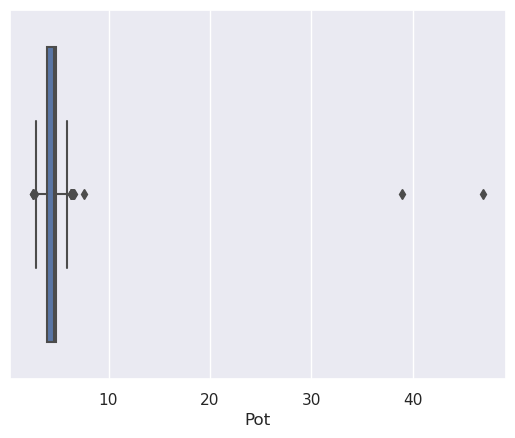

In [19]:
sns.boxplot(x=df2['Pot'])

## Dealing with outliers using Z-score method

In [20]:
import scipy.stats as stats

In [21]:
z=np.abs(stats.zscore(df2))
data_clean=df2[(z<3).all(axis=1)]
data_clean.shape

(420, 14)

<AxesSubplot:>

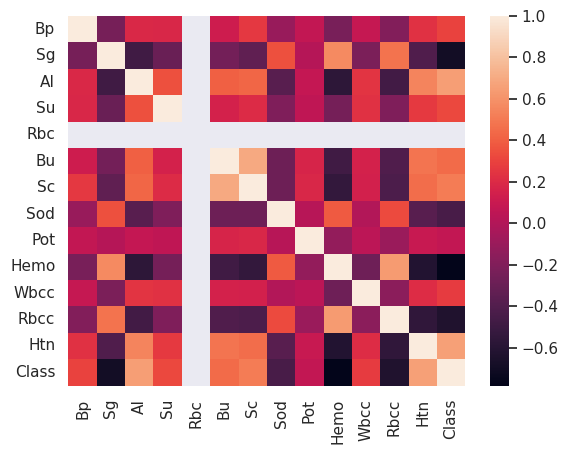

In [22]:
sns.heatmap(data_clean.corr())

## Dropping RBC Column since it doesn't contain any information/data

In [23]:
data_clean_2=df.drop(columns=['Rbc'])

In [24]:
data_clean_2

,Bp,Sg,Al,Su,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,49.0,0.5,150.00,4.90,15.7,6700.0,4.90,0.0,0
396,70.0,1.025,0.0,0.0,31.0,1.2,141.00,3.50,16.5,7800.0,6.20,0.0,0
397,80.0,1.020,0.0,0.0,26.0,0.6,137.00,4.40,15.8,6600.0,5.40,0.0,0
398,60.0,1.025,0.0,0.0,50.0,1.0,135.00,4.90,14.2,7200.0,5.90,0.0,0


In [25]:
corr=data_clean_2[data_clean_2.columns[1:]].corr()['Class'][:-1]
corr

Sg     -0.659504
Al      0.598389
Su      0.294555
Bu      0.371982
Sc      0.294076
Sod    -0.342268
Pot     0.077063
Hemo   -0.729537
Wbcc    0.205266
Rbcc   -0.590248
Htn     0.586340
Name: Class, dtype: float64

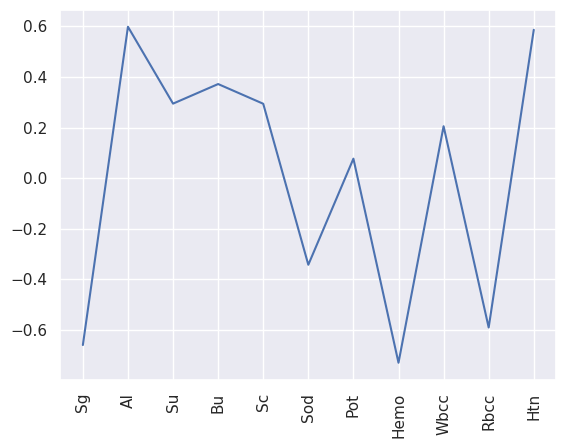

In [26]:
plt.plot(corr)
plt.xticks(rotation=90)
plt.show()

## Applying algorithms

### Logistic Regression

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x=data_clean_2.drop('Class',axis=1)
y=data_clean_2['Class']

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [47]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [48]:
# Fitting the model 
model.fit(x_train,y_train)

LogisticRegression()

In [49]:
# Predicting the model
y_pred_logistic=model.predict(x_test)
y_pred_logistic

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0])

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_logistic=accuracy_score(y_test,y_pred_logistic)*100
print(f"The accuracy of the model using Logistic Regression is:  {accuracy_logistic}%")

The accuracy of the model using Logistic Regression is:  94.0%


## KNN

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [98]:
knn = KNeighborsClassifier(n_neighbors=7)

In [99]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [100]:
y_pred_knn=knn.predict(x_test)
y_pred_knn

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [101]:
accuracy_knn=accuracy_score(y_test,y_pred_knn)*100
print(f"The accuracy of the model using KNN is:  {accuracy_knn}%")

The accuracy of the model using KNN is:  71.0%


## Random Forest Algorithm

In [57]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [58]:
y_pred_random= classifier.predict(x_test)  

In [61]:
accuracy_random=accuracy_score(y_test,y_pred_random)*100
print(f"The accuracy of the model using Random Forest is:  {accuracy_random}%")

The accuracy of the model using Random Forest is:  100.0%


## Ada Boost Algorithm

In [62]:
from sklearn.ensemble import AdaBoostClassifier

In [65]:
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_abc = model.predict(x_test)

accuracy_abc=accuracy_score(y_test,y_pred_abc)*100

print(f"The accuracy of the model using Ada Boost Classifer is:  {accuracy_abc}%")

The accuracy of the model using Ada Boost Classifer is:  99.0%


### Final Conclusion:

- Random Forest Algorithm                              -        100% Accuracy
- Ada Boost Algorithm                                  -        99% Accuracy
- Logistic Regression Algorithm                        -        94% Accuracy
- KNN Algorithm                                        -        71% Accuracy      